<a id='home_cell'></a>
## BLOG POST - What do your graphs reveal in terms of your individual variables and the relationship between them? 

*Please note I have chosen to use GitHub / Jupyter notebooks in substitute of Tumblr for my blog assignments

For this exercise - The majority of analysis is on data that is filtered down to only defaulted 
    loans.  The last analysis is on the full data set, contrasting defaulted vs non-defaulted 
    loans.  Prior data analysis was on the entire data set, but now I realize I have to dig 
    into the sub-set of data of defaulted loans to examine the elements more closely.  


In preliminary analysis (univariate), I focused on the largest type of loans issues 
    by number of counts that went into default. The largest population of loan type was 
    the “deb consolidation” category.  The highest portion of defaulted loans was in the 
    10% - 20% interest rate category.  The revolving utilization rate was pretty Even for 
    the 50%-75% and 75%-100% rates.  This may indicate that as the revolving utilization 
    rate passes 50%, we might expect more loans to possibly default.  
    
[Univariate Graphs (Binned)](#binned_graphs) 

[Univariate Graphs (Distribution)](#distribution_graphs) 


As for correlations between my predictor and response variables - I did have some challenges 
    determining variables to use for a scatter plot to mesh the number of defaults to a higher 
    interest rate or revolving utilization.  So I added the variable “loan_amnt” that is 
    the loan amount, and filtered the data down to only defaulted loans.  The loan amount 
    for any loan defaulted is the amount charged off (typically), so I attempted to find 
    some correlations between the variables and the amount charged off.  I did notice an 
    interesting trend that the higher the percentage, usually, the higher the loan amount was.  
    I would have expected this to be the reverse.  When I added grouped regression lines, 
    I could start to see that the defaulted loan amounts typically had higher interest rates
    over all.

[Bivariate Graphs](#bivariate_graphs) 

In [1]:
# imports
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

In [2]:
# set working directory
directory = '//Project/OneDrive/Coursera/Wesleyan_Course1/wk1_Assignment/'

In [3]:
# =====================
# 2. DATA IMPORT 
# =====================
pdLoans = pandas.read_csv(directory + 'LoanStats3a.csv', low_memory=False)

In [4]:
# =======================
#  3. DATA TRANSFORMATIONS 
#  ======================= 
# Convert the data elements - just doing in 
pdLoans["int_rate_d"] = pandas.to_numeric(pdLoans["int_rate"].str.replace('%',''), errors='coerce')
pdLoans["revol_util_d"] = pandas.to_numeric(pdLoans["revol_util"].str.replace('%',''), errors='coerce')

# divide by 100 to get the true percentage
pdLoans["int_rate_d"] = pdLoans["int_rate_d"] / 100.00
pdLoans["revol_util_d"] = pdLoans["revol_util_d"] / 100.00

# Convert and Bin the data
pdLoans['int_rate_bin'] = pandas.cut(pdLoans.int_rate_d, [0.0,0.10,0.15,0.20,0.25,0.30])
pdLoans['dti_bin'] = pandas.cut(pdLoans.dti, [0,1,10,20,30])
pdLoans['revol_util_bin'] = pandas.cut(pdLoans.revol_util_d, [0,0.25,0.5,0.75,1])


In [5]:
# Add a veriable for recoveries / collection_recovery_fee.  
# If either is greather than 0, then assign a 1 to indicate a default
# Create a function to Map
def set_Defaulted (row):
    if row['recoveries'] > 0:
        return 1
    if row['collection_recovery_fee'] > 0:
        return 1
    else:
        return 0 

In [6]:
pdLoans['defaulted'] = pdLoans.apply(lambda row: set_Defaulted(row), axis=1)

In [7]:
# Here split out separate date set for the defaulted loans - for analayis use later
pdLoansDefaulted = pdLoans[pdLoans['defaulted'] == 1]

## Univariate Graphs (Binned)
<a id='binned_graphs'></a>

[Home](#home_cell)

In [8]:
# =======================================================
# 4. STEP 1 - Create a graph of your variables one at a time
# =======================================================

# purpose", int_rate", "dti", "revol_util" and "recoveries" 

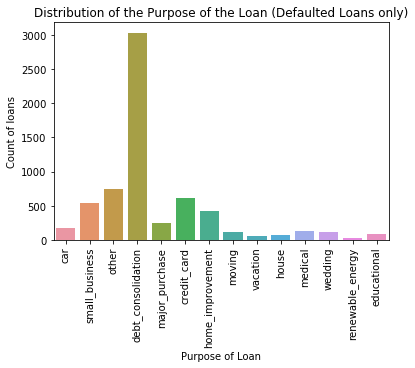

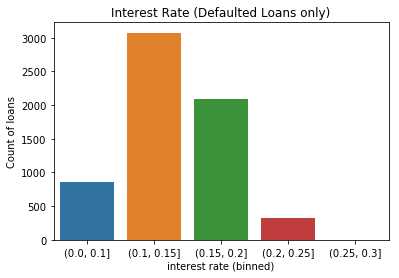

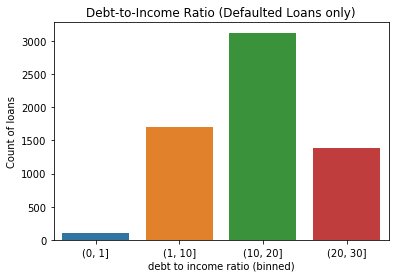

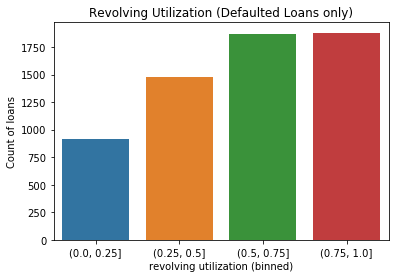

In [9]:
g = seaborn.countplot(x="purpose", data=pdLoansDefaulted);
# Rotate the x tick labels
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Distribution of the Purpose of the Loan (Defaulted Loans only)')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of loans')
plt.show()

seaborn.countplot(x="int_rate_bin", data=pdLoansDefaulted);
plt.title('Interest Rate (Defaulted Loans only)')
plt.xlabel('interest rate (binned)')
plt.ylabel('Count of loans')
plt.show()

seaborn.countplot(x="dti_bin", data=pdLoansDefaulted);
plt.title('Debt-to-Income Ratio (Defaulted Loans only)')
plt.xlabel('debt to income ratio (binned)')
plt.ylabel('Count of loans')
plt.show()

seaborn.countplot(x="revol_util_bin", data=pdLoansDefaulted);
plt.title('Revolving Utilization (Defaulted Loans only)')
plt.xlabel('revolving utilization (binned)')
plt.ylabel('Count of loans')
plt.show()

## Univariate Graphs (Distribution)
<a id='distribution_graphs'></a>

[Home](#home_cell)

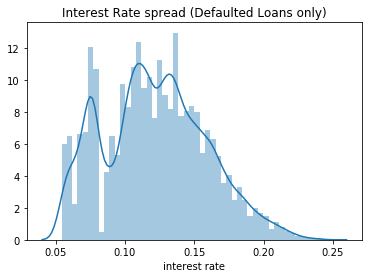

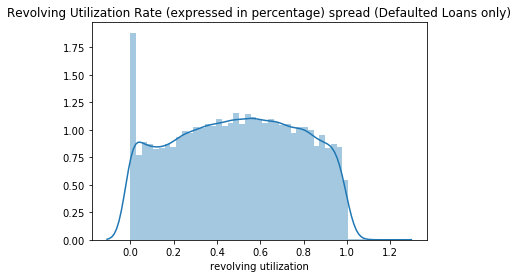

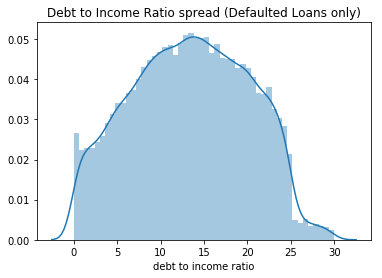

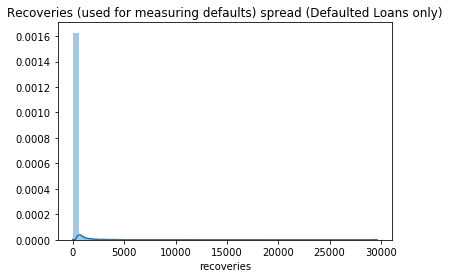

In [10]:
# Univariate histogram for the quantitative variable:
seaborn.distplot(pdLoans["int_rate_d"].dropna(), kde=True);
plt.title('Interest Rate spread (Defaulted Loans only)')
plt.xlabel('interest rate')
plt.show()

seaborn.distplot(pdLoans["revol_util_d"].dropna(), kde=True);
plt.title('Revolving Utilization Rate (expressed in percentage) spread (Defaulted Loans only)')
plt.xlabel('revolving utilization')
plt.show()

seaborn.distplot(pdLoans["dti"].dropna(), kde=True);
plt.title('Debt to Income Ratio spread (Defaulted Loans only)')
plt.xlabel('debt to income ratio')
plt.show()

seaborn.distplot(pdLoans["recoveries"].dropna(), kde=True);
plt.title('Recoveries (used for measuring defaults) spread (Defaulted Loans only)')
plt.xlabel('recoveries')
plt.show()

## Bivariate Graphs 
<a id='bivariate_graphs'></a>

[Home](#home_cell)

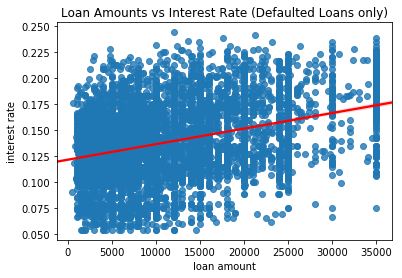

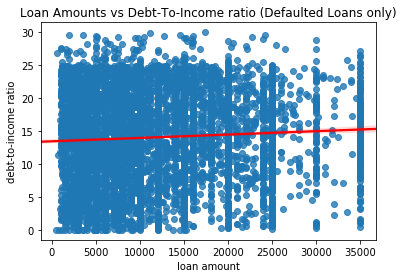

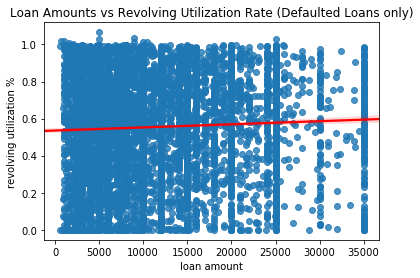

In [11]:
#  ===========================================================================================
#   5. STEP 2 - Create a graph showing association between your explanatory and response variables 
#   ===========================================================================================

# Plot graphs
seaborn.regplot(x="loan_amnt", y="int_rate_d", data=pdLoansDefaulted, line_kws={'color': 'red'})
plt.title('Loan Amounts vs Interest Rate (Defaulted Loans only)')
plt.xlabel('loan amount')
plt.ylabel('interest rate')
plt.show()

seaborn.regplot(x="loan_amnt", y="dti", data=pdLoansDefaulted, line_kws={'color': 'red'})
plt.title('Loan Amounts vs Debt-To-Income ratio (Defaulted Loans only)')
plt.xlabel('loan amount')
plt.ylabel('debt-to-income ratio')
plt.show()

seaborn.regplot(x="loan_amnt", y="revol_util_d", data=pdLoansDefaulted, line_kws={'color': 'red'})
plt.title('Loan Amounts vs Revolving Utilization Rate (Defaulted Loans only)')
plt.xlabel('loan amount')
plt.ylabel('revolving utilization %')
plt.show()

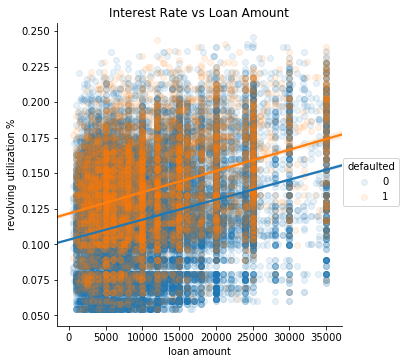

In [12]:
seaborn.lmplot(data=pdLoans, x='loan_amnt', y='int_rate_d', hue='defaulted', scatter_kws={'alpha':0.1})
plt.title('Interest Rate vs Loan Amount')
plt.xlabel('loan amount')
plt.ylabel('revolving utilization %')
plt.show()